In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

### 2 задание
Легенда. 
У Тинькофф Квест есть бонусные купоны. Такой купон дает право участия в квесте со скидкой. Купоны бывают трех типов: Alpha, Beta, Gamma. Они немного отличаются по условиям, в том числе по сроку действия, а также выдаются в разных точках. Каждый купон имеет свой Id; дата выдачи каждого купона фиксируется. Человек, получивший купон, может им воспользоваться или не воспользоваться.



Задание. 
Проанализируйте уровень использования каждого типа купонов и сравните их между собой. В ответе укажите процент использования каждого типа и подтвердите эти цифры таблицей/графиком, по которым вы сделали вывод.



Допустим, сегодня 11 апреля 2021.

В схеме msu_statistics.dz_82 - данные по купонам, выданным с 1 ноября 2020г по вчерашний день (10.04.21).



Структура данных:
 card_nm - название типа купонов 

 card_id - Id конкретного купона 

 receive_dt - дата выдачи купона 

 use_dt - дата использования купона (если есть) 

In [2]:
df = pd.read_excel('dz_z2.xlsx')

In [3]:
df

,card_nm,card_id,receive_dt,use_dt
0,Beta,7637320,2020-11-02,NaT
1,Alpha,7635974,2020-11-02,NaT
2,Alpha,7635511,2020-11-02,NaT
3,Gamma,7635258,2020-11-02,2020-12-13
4,Beta,7634217,2020-11-02,NaT
...,...,...,...,...
6759,Alpha,637512,2021-04-08,NaT
6760,Beta,637397,2021-04-08,NaT
6761,Alpha,628982,2021-04-08,2021-04-10
6762,Beta,625773,2021-04-08,NaT


In [4]:
df.dtypes

card_nm               object
card_id                int64
receive_dt    datetime64[ns]
use_dt        datetime64[ns]
dtype: object

In [5]:
df.use_dt.notna().sum()

1594

In [6]:
df['day_diff'] = (df.use_dt - df.receive_dt).dt.days

C:\Users\volat\AppData\Local\Temp\ipykernel_8324\1506168581.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.query('card_nm == "Alpha"').day_diff, color = 'olivedrab', hist = True, kde = False, ax = ax)
C:\Users\volat\AppData\Local\Temp\ipykernel_8324\1506168581.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad63727

Text(0.5, 1.0, 'Beta')

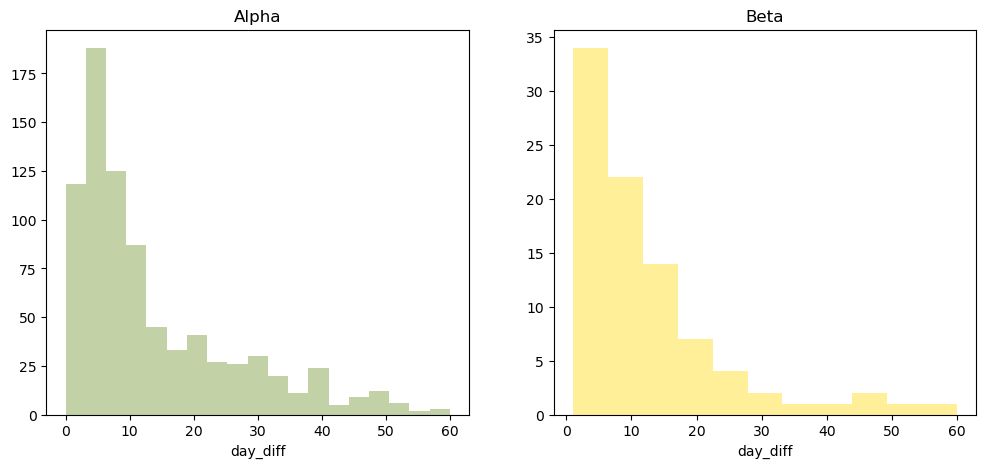

In [7]:
# распределение периода в днях между датой использования и датой выдачи купона по типу

f = plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(df.query('card_nm == "Alpha"').day_diff, color = 'olivedrab', hist = True, kde = False, ax = ax)
ax.set_title('Alpha')

ax=f.add_subplot(122)
sns.distplot(df.query('card_nm == "Beta"').day_diff, color = 'gold', hist = True, kde = False, ax = ax)
ax.set_title('Beta')

C:\Users\volat\AppData\Local\Temp\ipykernel_8324\3721853483.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.query('card_nm == "Gamma"').day_diff, color = 'blue', hist = True, kde = False, ax = ax)


Text(0.5, 1.0, 'Gamma')

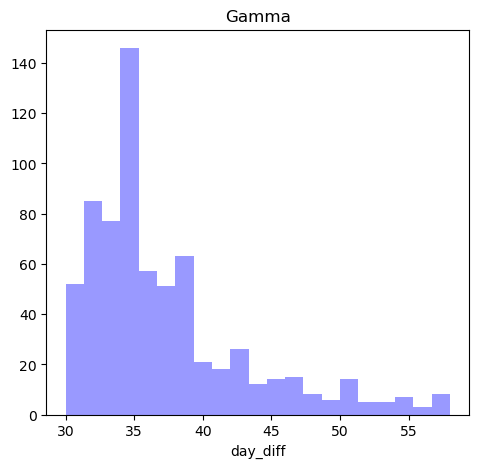

In [8]:
f = plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(df.query('card_nm == "Gamma"').day_diff, color = 'blue', hist = True, kde = False, ax = ax)
ax.set_title('Gamma')

Для сравнения подходят медианы 3-х групп, распределения скошены вправо (положительно ассиметричны)

In [9]:
conversion = df.groupby('card_nm', as_index=False) \
                .agg({'card_id': 'nunique', 'use_dt': 'count', 'day_diff': 'median'}) \
                .rename(columns={'card_id': 'amount'}) \
                .round(0)

conversion['cr'] = round(conversion.use_dt / conversion.amount, 4) * 100

conversion

,card_nm,amount,use_dt,day_diff,cr
0,Alpha,3569,812,9.0,22.75
1,Beta,1272,89,8.0,7.00
2,Gamma,1922,693,35.0,36.06


In [10]:
cr_gamma_to_alpha = conversion.iloc[2, 4] / conversion.iloc[0, 4] * 100
print('cr_gamma_to_alpha',round(cr_gamma_to_alpha, 0),'%')

cr_gamma_to_alpha 159.0 %


In [11]:
cr_gamma_to_beta = conversion.iloc[2, 4] / conversion.iloc[1, 4] * 100
print('cr_gamma_to_beta',round(cr_gamma_to_beta, 0),'%')

cr_gamma_to_beta 515.0 %


In [12]:
day_diff_gamma_to_alpha = conversion.iloc[2, 3] / conversion.iloc[0, 3] * 100
print('day_diff_gamma_to_alpha',round(day_diff_gamma_to_alpha, 0),'%')

day_diff_gamma_to_alpha 389.0 %


In [13]:
day_diff_gamma_to_beta = conversion.iloc[2, 3] / conversion.iloc[1, 3] * 100
print('day_diff_gamma_to_beta',round(day_diff_gamma_to_beta, 0),'%')

day_diff_gamma_to_beta 438.0 %


Выводы:

- У купонов типа Gamma самая высокая конверсия в использование - 36.06%, что на 159% больше, чем у Alpha (22.75%) и на 515% больше, чем у Gamma (7%)
- У купонов типа Gamma самый длительный средний период между датой использования и датой выдачи - 35 дней, что на 389% больше, чем у Alpha (9 дней) и на 438% больше, чем у Gamma (8 дней)